In [195]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


We do convergence in two ways. 

*1.- To cone* In one we keep fixed (at 17) the number of points in L, and set $dl = dr$. To keep the grid the same we do: 
    1. $L+R = C (=2)$
    2. $N_t = N_l + N_r $ 
    3. $dr = dl = C/(N_t-2)$
    4. $dr_i = dr*2^{i-1},\; i = 1...$
    5. $N_t^i = (N_t-2)2^{i-1} + 2$
    6. $N_r^i = N_t^i - N_l$
    7. The position of $L_0$ is $L_0 = dr_i (n_i -1) = dr(N_l-1)$
    8. Thus, the first point on the $N_t$ grid which coincides with the point $1$ in the initial $N_r$ grid is: $n_i = (N_l-1)2^{i-1}+2$ So, $n_0 = N_l+1$, $n_1 = 2N_l$, $n_2 = 4N_l -2$. 

*2.- Normal convergence* We increase points both in L and R so that everithing is the same.

In [196]:
include("aux_functions.jl")

bump_x (generic function with 1 method)

In [240]:
l_pulse = false
r_pulse = false
c_pulse = false
#l_pulse = true 
r_pulse = true
#c_pulse = true

file_name=fill("",6)

if l_pulse
    file_name = "Results/l_pulse_401_401.jld2"
elseif r_pulse
    file_name[1] = "Results/r_pulse_401_401.jld2"
    file_name[2] = "Results/r_pulse_801_801.jld2"
    file_name[3] = "Results/r_pulse_1601_1601.jld2"
    file_name[4] = "Results/r_pulse_3201_3201.jld2"
elseif c_pulse
    file_name[1] = "Results/c_pulse_17_385.jld2"
    file_name[2] = "Results/c_pulse_17_785.jld2"
    file_name[3] = "Results/c_pulse_17_1585.jld2"
    file_name[4] = "Results/c_pulse_17_3185.jld2"
end

"Results/r_pulse_3201_3201.jld2"

In [234]:
((Nl, L, dl, Nr, R, dr), (t_i, t_f, M, dt, M_d, dt_d), r, l, t, u, v_1) = get_data(file_name[1],1)
nis = (Nl-1)*2^(1-1) + 2 - Nl
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_R_1 = view(v_1,3Nl+nis:3Nl+Nr,:)
S_1 = view(v_1,3Nl+Nr+nis:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_2,l_2,t_2,u_2,v_2) = get_data(file_name[2],1)
nis = (Nl-1)*2^(2-1) + 2 - Nl
ϕ_L_2 = view(v_2,1:Nl,:)
ϕ_R_2 = view(v_2,3Nl+nis:2:3Nl+Nr,:)
S_2 = view(v_2,3Nl+Nr+nis:2:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_3,l_3,t_3,u_3,v_3) = get_data(file_name[3],1)
nis = (Nl-1)*2^(3-1) + 2 - Nl
ϕ_L_3 = view(v_3,1:Nl,:)
ϕ_R_3 = view(v_3,3Nl+nis:4:3Nl+Nr,:)
S_3 = view(v_3,3Nl+Nr+nis:4:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_4,l_4,t_4,u_4,v_4) = get_data(file_name[4],1)
nis = (Nl-1)*2^(4-1) + 2 - Nl
ϕ_L_4 = view(v_4,1:8:Nl,:)
ϕ_R_4 = view(v_4,3Nl+nis:8:3Nl+Nr,:)
S_4 = view(v_4,3Nl+Nr+nis:8:3Nl+2Nr,:);

(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.08, 0.005, 385, 1.92, 0.005)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 801, 0.0025, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.04, 0.0025, 785, 1.96, 0.0025)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 1601, 0.00125, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.02, 0.00125, 1585, 1.98, 0.00125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 3201, 0.000625, 81, 0.025)
(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.01, 0.000625, 3185, 1.99, 0.000625)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 6401, 0.0003125, 81, 0.025)


In [199]:
#=
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_L_2 = view(v_1,1:Nl,:)
ϕ_L_3 = view(v_1,1:Nl,:)
vp_1 = view(v_1,Nl+1:2Nl,:)
vm_1 = view(v_1,2Nl+1:3Nl,:)
ϕ_R_1 = view(v_1,3Nl+1:3Nl+Nr,:)
S_1 = view(v_1,3Nl+Nr+1:3Nl+2Nr,:)
W_1 = view(v_1,3Nl+2Nr+1:3Nl+3Nr,:);
=#

(x0, x1, p_bump, A) = data["par_init"] = (0.28, 0.48000000000000004, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (17, 0.08, 0.005, 385, 1.92, 0.005)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 801, 0.0025, 81, 0.025)


In [200]:
sizeof(ϕ_R_1)
sizeof(ϕ_R_2)
sizeof(ϕ_R_3)
sizeof(ϕ_R_4)

249480

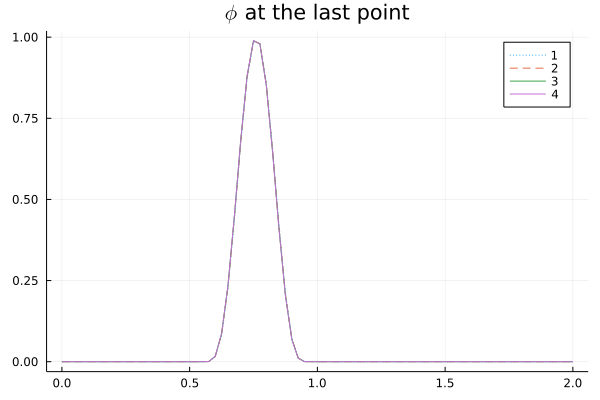

In [211]:
plot(t,ϕ_R_1[end,:],label="1",ls=:dot, title=L"\phi"*" at the last point")
plot!(t,ϕ_R_2[end,:],label="2",ls=:dash)
plot!(t,ϕ_R_3[end,:],label="3")
plot!(t,ϕ_R_4[end,:],label="4")

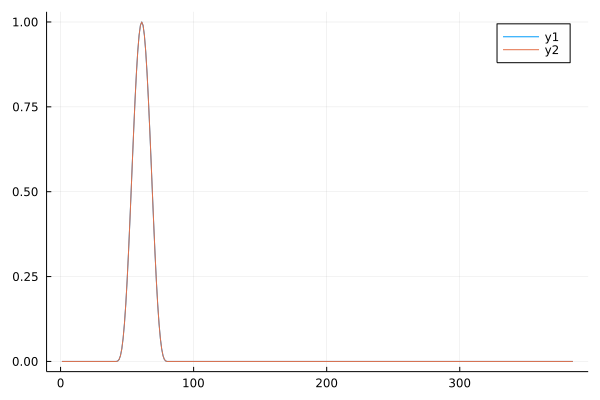

In [212]:
plot(ϕ_R_2[1:end,n])
plot!(ϕ_R_1[1:end,n])

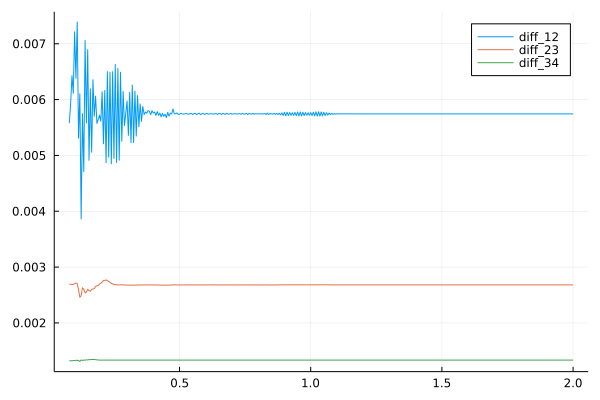

In [216]:
n=30


plot(r[1:end],ϕ_R_2[1:end,n]-ϕ_R_1[1:end,n],label="diff_12")
plot!(r[1:end],ϕ_R_3[1:end,n]-ϕ_R_2[1:end,n],label="diff_23")
plot!(r[1:end],ϕ_R_4[1:end,n]-ϕ_R_3[1:end,n],label="diff_34")

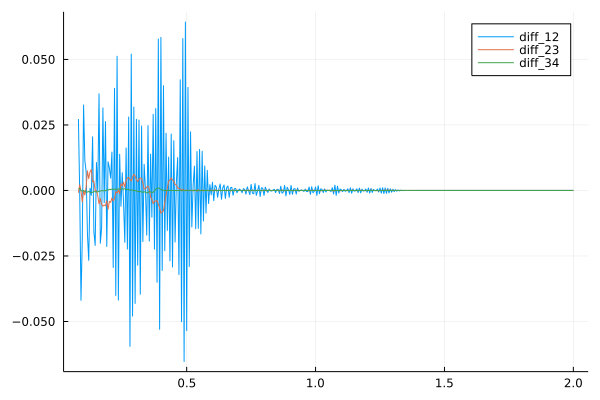

In [224]:
n=40


plot(r[1:end],S_2[1:end,n]-S_1[1:end,n],label="diff_12")
plot!(r[1:end],S_3[1:end,n]-S_2[1:end,n],label="diff_23")
plot!(r[1:end],S_4[1:end,n]-S_3[1:end,n],label="diff_34")

In [217]:
Q234 = [sum(abs.(ϕ_R_2[:,i] - ϕ_R_3[:,i]))/sum(abs.(ϕ_R_3[:,i] -ϕ_R_4[:,i])) for i in 2:M_d]
Q123 = [sum(abs.(ϕ_R_1[:,i] - ϕ_R_2[:,i]))/sum(abs.(ϕ_R_2[:,i] -ϕ_R_3[:,i])) for i in 2:M_d]

80-element Vector{Float64}:
 14.953332226847786
 14.800033504661949
 15.067101210215116
 13.597125334208766
 13.395185910513797
 13.724060413363608
 14.22429808153207
 14.07222575413548
 13.923486368477887
 13.965048464225546
  ⋮
  8.703968241468536
  8.708984039146344
  8.772308736444995
  8.786953147983745
  8.767243875442775
  8.774071262126078
  8.738426558998592
  8.744629352260855
  8.7276999326491

In [225]:
Q234_S = [sum(abs.(S_2[:,i] - S_3[:,i]))/sum(abs.(S_3[:,i] -S_4[:,i])) for i in 2:M_d]
Q123_S = [sum(abs.(S_1[:,i] - S_2[:,i]))/sum(abs.(S_2[:,i] -S_3[:,i])) for i in 2:M_d];

80-element Vector{Float64}:
 8.571451113793982
 6.924590874596299
 8.777277216354644
 8.270547458472116
 9.413257119422079
 8.809871348876921
 8.832743377857529
 8.452230564095407
 8.265965909323212
 8.696183367998657
 ⋮
 8.563625073135722
 8.509330218352586
 8.456408975991907
 8.46637582012949
 8.4268175720058
 8.51148668778733
 8.475572165075308
 8.475440765054268
 8.425638999087667

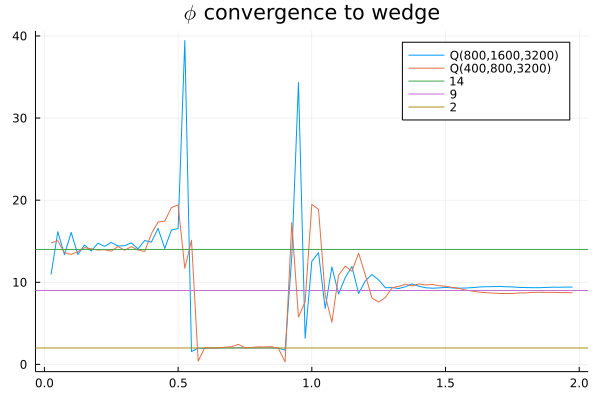

In [232]:
s = 80
plot(t[2:s],Q234[2:s],label="Q(800,1600,3200)",title=L"\phi"*" convergence to wedge")
plot!(t[2:s],Q123[2:s],label="Q(400,800,3200)")
hline!([14],label="14")
hline!([9],label="9")
hline!([2],label="2")

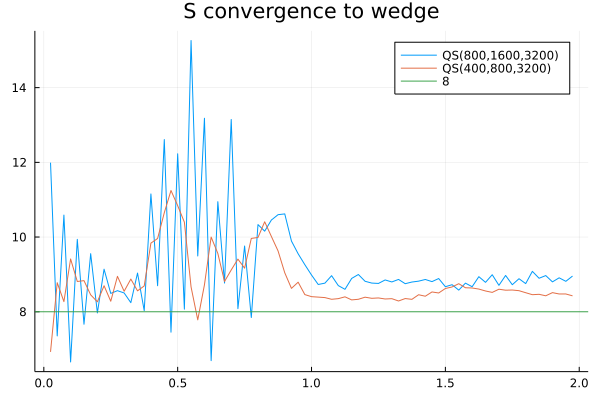

In [233]:
s = 80
plot(t[2:s],Q234_S[2:s],label="QS(800,1600,3200)",title="S convergence to wedge")
plot!(t[2:s],Q123_S[2:s],label="QS(400,800,3200)")
hline!([8],label="8")

### Normal convergence 

In [244]:
((Nl, L, dl, Nr, R, dr), (t_i, t_f, M, dt, M_d, dt_d), r, l, t, u, v_1) = get_data(file_name[1],1)
nis = 1
ϕ_L_1 = view(v_1,1:Nl,:)
ϕ_R_1 = view(v_1,3Nl+nis:3Nl+Nr,:)
S_1 = view(v_1,3Nl+Nr+nis:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_2,l_2,t_2,u_2,v_2) = get_data(file_name[2],1)
nis = 1
ϕ_L_2 = view(v_2,1:Nl,:)
ϕ_R_2 = view(v_2,3Nl+nis:2:3Nl+Nr,:)
S_2 = view(v_2,3Nl+Nr+nis:2:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_3,l_3,t_3,u_3,v_3) = get_data(file_name[3],1)
nis = 1
ϕ_L_3 = view(v_3,1:Nl,:)
ϕ_R_3 = view(v_3,3Nl+nis:4:3Nl+Nr,:)
S_3 = view(v_3,3Nl+Nr+nis:4:3Nl+2Nr,:)
((Nl, L, dl, Nr, R, dr),(t_i, t_f, M, dt, M_d, dt_d),r_4,l_4,t_4,u_4,v_4) = get_data(file_name[4],1)
nis = 1
ϕ_L_4 = view(v_4,1:8:Nl,:)
ϕ_R_4 = view(v_4,3Nl+nis:8:3Nl+Nr,:)
S_4 = view(v_4,3Nl+Nr+nis:8:3Nl+2Nr,:);

(x0, x1, p_bump, A) = data["par_init"] = (1.2, 1.4, 6, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (401, 1.0, 0.0025, 401, 1.0, 0.0025)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 3.0, 1801, 0.0016666666666666668, 151, 0.02)
(x0, x1, p_bump, A) = data["par_init"] = (1.2, 1.4, 6, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (801, 1.0, 0.00125, 801, 1.0, 0.00125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 3.0, 3601, 0.0008333333333333334, 151, 0.02)
(x0, x1, p_bump, A) = data["par_init"] = (1.2, 1.4, 6, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (1601, 1.0, 0.000625, 1601, 1.0, 0.000625)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 3.0, 7201, 0.0004166666666666667, 151, 0.02)
(x0, x1, p_bump, A) = data["par_init"] = (1.2, 1.4, 6, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (3201, 1.0, 0.0003125, 3201, 1.0, 0.0003125)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 3.0, 14401, 0.00020833333333333335, 151, 0.02)


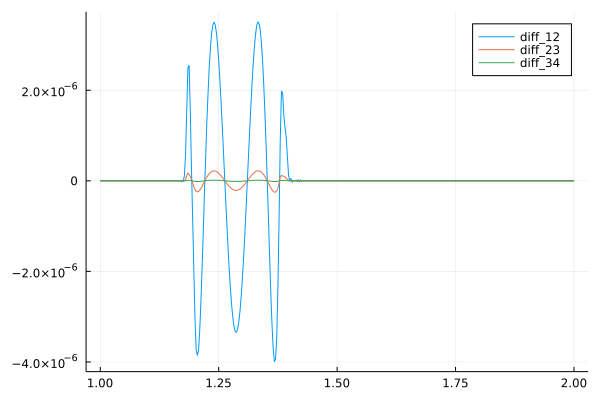

In [245]:
n=3


plot(r[1:end],ϕ_R_2[1:end,n]-ϕ_R_1[1:end,n],label="diff_12")
plot!(r[1:end],ϕ_R_3[1:end,n]-ϕ_R_2[1:end,n],label="diff_23")
plot!(r[1:end],ϕ_R_4[1:end,n]-ϕ_R_3[1:end,n],label="diff_34")

In [248]:
Q234 = [sum(abs.(ϕ_R_2[:,i] - ϕ_R_3[:,i]))/sum(abs.(ϕ_R_3[:,i] -ϕ_R_4[:,i])) for i in 2:M_d]
Q123 = [sum(abs.(ϕ_R_1[:,i] - ϕ_R_2[:,i]))/sum(abs.(ϕ_R_2[:,i] -ϕ_R_3[:,i])) for i in 2:M_d];

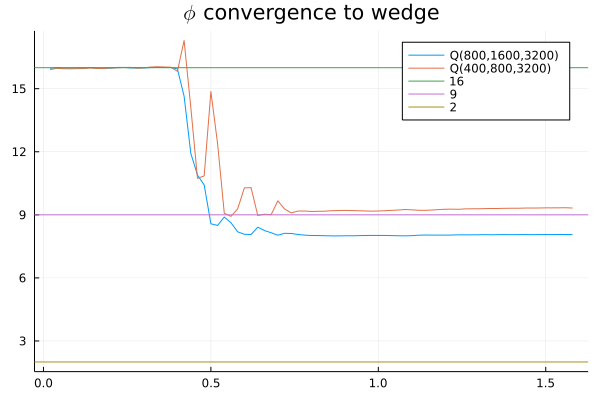

In [250]:
s = 80
plot(t[2:s],Q234[2:s],label="Q(800,1600,3200)",title=L"\phi"*" convergence to wedge")
plot!(t[2:s],Q123[2:s],label="Q(400,800,3200)")
hline!([16],label="16")
hline!([9],label="9")
hline!([2],label="2")

In [251]:
Q234_S = [sum(abs.(S_2[:,i] - S_3[:,i]))/sum(abs.(S_3[:,i] -S_4[:,i])) for i in 2:M_d]
Q123_S = [sum(abs.(S_1[:,i] - S_2[:,i]))/sum(abs.(S_2[:,i] -S_3[:,i])) for i in 2:M_d];

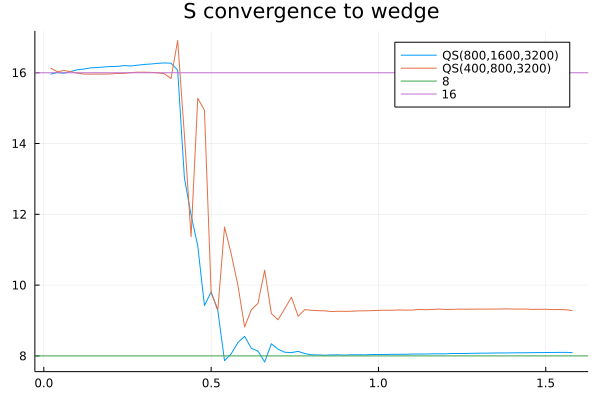

In [253]:
s = 80
plot(t[2:s],Q234_S[2:s],label="QS(800,1600,3200)",title="S convergence to wedge")
plot!(t[2:s],Q123_S[2:s],label="QS(400,800,3200)")
hline!([8],label="8")
hline!([16],label="16")